In [1]:
#TODO test notebook on workshop computer
#     gather results into report (best yed layout to use?), tabulate results of exercises 7-8 
#     rewrite fc graph algorithm
#     Use election years as labels rather than consecutive integers - done for FC but not other graphs
#     check correctness - compare mst output to that of newtorkx mst function
#     find more optimal solutions for subgraphs.py if time permits
#     add verbose parameter to subgraphs methods, set to 0 before placing code in pdf
# Questions
#     Does question 1c require the MST using the results of 1a or 1b? A: choose whatever
#     For graph creation, the jaccard measure shouldn't be used directly? Using matrix of (1 - j) values for now
        # Make this (1 - j) occur at matrix creation rather than just before graphs are generated
        # A: use whatever is in the cited source
#     Announcement suggests merging vertices with distance of 0, is this necessary or optional?
        # This might change the results of the KNN algorithm
        # A: Optional

In [2]:
# Cite jaccad measure and jaccard measure complement (distance) resource (Wikipedia is acceptable)
# Cite hamming distance resource
# Cite lecture notes for graph algorithms
# Section of report containing code, python version and project setup (submission only accepts pdf, can't .py files)

In [3]:
import math
import networkx as nx
import numpy as np
import os
import pandas as pd
import pylab as plt

In [4]:
data = pd.read_csv("USPresidency.csv")
print(data.head())

   Year  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Q11  Q12  Target
0  1864   0   0   0   0   1   0   0   1   1    0    0    0       1
1  1868   1   1   0   0   0   0   1   1   1    0    1    0       1
2  1872   1   1   0   0   1   0   1   0   0    0    1    0       1
3  1880   1   0   0   1   0   0   1   1   0    0    0    0       1
4  1888   0   0   0   0   1   0   0   0   0    0    0    0       1


In [5]:
# Store election years to be used as labels
elections_data = data.iloc[:, 0]
elections = []
for index, election in enumerate(elections_data):
    # Convert from int64 to int, to prevent networkx related errors
    elections.append(int(elections_data[index]))
    print(election, end=", ")

1864, 1868, 1872, 1880, 1888, 1900, 1904, 1908, 1916, 1924, 1928, 1936, 1940, 1944, 1948, 1956, 1964, 1972, 1860, 1876, 1884, 1892, 1896, 1912, 1920, 1932, 1952, 1960, 1968, 1976, 1980, 

In [6]:
# Remove class type and instance label
data = data.iloc[:, 1:-1]
print(data.head())

   Q1  Q2  Q3  Q4  Q5  Q6  Q7  Q8  Q9  Q10  Q11  Q12
0   0   0   0   0   1   0   0   1   1    0    0    0
1   1   1   0   0   0   0   1   1   1    0    1    0
2   1   1   0   0   1   0   1   0   0    0    1    0
3   1   0   0   1   0   0   1   1   0    0    0    0
4   0   0   0   0   1   0   0   0   0    0    0    0


In [7]:
# Functions used for generating required matrices
def hamming_distance(x, y):
    distance = 0
    for i in range(len(x)):
        print(x[i], end=", ")
        if x[i] != y[i]:
            distance += 1
    
    print(".")
    return distance


def union_size(x, y):
    count = 0
    for index, item in enumerate(x):
        if item or y[index] == 1:
            count += 1
    
    return count


def intersect_size(x, y):
    count = 0
    for index, item in enumerate(x):
        if item == y[index] and item == 1:
            count += 1
            
    return count

SyntaxError: invalid syntax (<ipython-input-7-375f96c2ad34>, line 5)

In [8]:
print(data.iloc[0, :].values)

[0 0 0 0 1 0 0 1 1 0 0 0]


In [9]:
# Create Hamming Distance and Jaccard measure matrices and save as csv
nsamp, nfeat = data.shape
D = np.zeros((nsamp, nsamp))
J = np.zeros((nsamp, nsamp))

for i in range(nsamp):
    for j in range(i, nsamp):
        di = data.iloc[i, :].values
        dj = data.iloc[j, :].values
        
        # Hamming Distance matrix
        dist = hamming_distance(di, dj)
        D[i][j] = D[j][i] = dist # Matrix is symmetric along diagonal
        
        # Jaccard measure matrix
        jaccard = intersect_size(di, dj) / union_size(di, dj)
        J[i][j] = J[j][i] = jaccard
        

if os.path.exists("US"):
    print("Path exists")
else:
    print("Path not found, creating directory")
    os.mkdir("US")


np.savetxt("US/HammingDistanceMatrix.csv", D, fmt="%.2f", delimiter=",")
np.savetxt("US/JaccardMeasureMatrix.csv", J, fmt="%.2f", delimiter=",")

NameError: name 'hamming_distance' is not defined

In [10]:
# Create the same matrices but for the columns(attributes) rather than the rows(instances)
D_f = np.zeros((nfeat, nfeat))
J_f = np.zeros((nfeat, nfeat))

for i in range(nfeat):
    for j in range(i, nfeat):
        di = data.iloc[:, i].values
        dj = data.iloc[:, j].values
        
        # Hamming Distance matrix
        dist = hamming_distance(di, dj)
        D_f[i][j] = D_f[j][i] = dist # Matrix is symmetric along diagonal
        
        # Jaccard measure matrix
        jaccard = intersect_size(di, dj) / union_size(di, dj)
        J_f[i][j] = J_f[j][i] = jaccard
        
        
np.savetxt("US/AttributeHammingDistanceMatrix.csv", D_f, fmt="%.2f", delimiter=",")
np.savetxt("US/AttributeJaccardMeasureMatrix.csv", J_f, fmt="%.2f", delimiter=",")

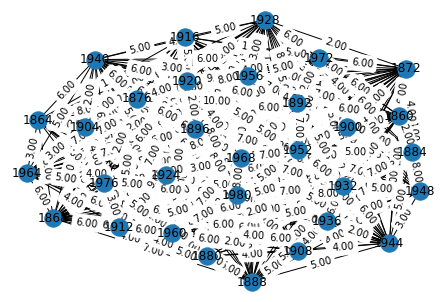

In [11]:
# Create fully connected graph
G = nx.Graph()

V = set()

labels = {}
for n in range(len(D)):
    V.add(n)
    for m in range(len(D) - (n+1)):
        u = elections[n]
        v = elections[n+m+1]
        G.add_edge(u, v, weight=D[n][n+m+1])
        labels[(u, v)] = "{:.2f}".format(D[n][n+m+1])
        
        
pos = nx.spring_layout(G)

nx.draw(G, pos)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

nx.write_gml(G, "US/us-graph-fc.gml")

In [12]:
import subgraphs as sg

In [13]:
# Used to reload library after it has been edited
import importlib
importlib.reload(sg)
print(sg.__version__)

0.3


In [14]:
# Create MST using Hamming Distance matrix
mst_hd = sg.mst(V, D, "US/us-graph-mst-hd.gml", elections)

In [15]:
# Create RNG using Hamming Distance matrix
_ = sg.rngraph(V, D, "US/us-graph-rng-hd.gml", elections)

In [16]:
# Convert Jaccard measure matrix into Jaccard distance matrix
JD = np.zeros((nsamp, nsamp))
for i in range(nsamp):
    for j in range(i, nsamp):
        JD[i][j] = JD[j][i] = 1 - J[i][j]
        
# Create MST using Jaccard distance matrix
mst_jd = sg.mst(V, JD, "US/us-graph-mst-jd.gml", elections)

In [17]:
# Create RNG using Jaccard distance matrix
_ = sg.rngraph(V, JD, "US/us-graph-rng-jd.gml", elections)

In [28]:
# Create KNN with k=2 using Hamming Distance matrix
knn_hd = sg.knn(V, D, 2, "US/us-graph-knn-hd.gml", elections)

In [19]:
# Create KNN with k=2 using Jaccard distance matrix
knn_jd = sg.knn(V, JD, 2, "US/us-graph-knn-jd.gml", elections)

In [20]:
# MST-KNN graph, k=2, Hamming Distance
_ = sg.mst_knn(mst_hd, knn_hd, "US/us-graph-mst-knn-hd.gml")

In [21]:
# MST-KNN graph, k=2, Jaccard distance
_ = sg.mst_knn(mst_jd, knn_jd, "US/us-graph-mst-knn-jd.gml")

In [33]:
# Generate MST-KNN using networkx's mst function to compare output
#mst_nx_edges = nx.minimum_spanning_edges(G)
mst_nx_edges = nx.algorithms.tree.mst.prim_mst_edges(G, True)

mst_nx = []
print(knn_hd[0])
for edge in mst_nx_edges:
    mst_nx.append([edge[0], edge[1], -1]) # Filler weight value, clusters are important due to shared edges not weights
    
_ = sg.mst_knn(mst_nx, knn_hd, "US/networkx-mst-knn-hd.gml")

[1864, 1972, 0.0]


In [35]:
mst_nx_graph = nx.minimum_spanning_tree(G, weight="weight", algorithm="prim")
nx.write_gml(mst_nx_graph, "US/networkx_mst_hd.gml")

In [ ]:
# See how merging identical elections affects results
print(type(HD))
HD2 = np.delete(HD, 17, 0)
HD2 = np.delete(HD2, 17, 1)

HD2 = np.delete(HD2, 6, 0)
HD2 = np.delete(HD2, 6, 1)
# np.savetxt("US/HammingDistanceMatrixMerged.csv", HD2, fmt="%.2f", delimiter=",")

elections2_data = np.delete(elections, 17)
elections2_data = np.delete(elections2_data, 6)

elections2 = []

# Convert np.int64 to python int
for index, election in enumerate(elections2_data):
    elections2.append(int(elections2_data[index]))
    
V2 = set(n for n in range(len(HD2)))

# mst_hd2 = sg.mst(V2, HD2, "US/us-graph-mst-hd.gml", elections2)
# knn_hd2 = sg.knn(V2, HD2, 2, "US/us-graph-knn-hd.gml", elections2)
# _ = sg.mst_knn(mst_hd2, knn_hd2, "US/us-graph-mst-knn-hd.gml")